In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.patches as patches
from matplotlib.patches import Ellipse

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from matplotlib import rcParams
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# Load Data

In [2]:
# Melakukan import csv
df = pd.read_csv("marketing_campaign_data.csv")
df.head(12)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
print(df.isnull().values.any())
print(df.isna().sum())

True
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# cek duplikate
df.duplicated().sum()

0

#  Feature engineering:

### conversion rate

In [6]:
df['NumWebVisitsMonth'].unique()


array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [7]:
visitors = df.groupby(['Education']).agg({'NumWebVisitsMonth' : 'count'}).reset_index()
visitors

,Education,NumWebVisitsMonth
0,D3,203
1,S1,1127
2,S2,370
3,S3,486
4,SMA,54


In [8]:
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth']
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,0,0,3,11,0,0.000000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,1,0,0,3,11,0,0.000000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,1,0,0,0,0,3,11,0,0.000000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,0,0,3,11,0,0.000000


### umur

In [9]:
def kelompok_usia(x):
    if x['Year_Birth'] <= 1954:
        kelompok = 'Lansia'
    elif x['Year_Birth'] >= 1955 and x['Year_Birth'] <= 1993: 
        kelompok = 'Dewasa'
    else: 
        kelompok  = 'Remaja'
    return kelompok  

df['grup_umur'] = df.apply(lambda x: kelompok_usia(x), axis=1)

### jumlah anak, total transaksi, total pengeluaran

In [10]:
df['jumlah_anak'] = df['Kidhome'] + df['Teenhome']
df['total_pembayaran'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Transaksi'] = df['Income'] - df['total_pembayaran'] 
df['total_acc_cmp'] = df['AcceptedCmp2'] + df['AcceptedCmp1'] + df['AcceptedCmp5'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] 


In [11]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2.240000e+03,2.216000e+03,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,0.013393,0.009375,3.0,11.0,0.149107,0.043686,0.950446,6.057982e+05,5.164018e+07,0.297768
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.114976,0.096391,0.0,0.0,0.356274,0.142981,0.751803,6.022493e+05,2.477466e+07,0.678381
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,5.000000e+03,7.170000e+05,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,6.875000e+04,3.516775e+07,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,1.000000,3.960000e+05,5.104650e+07,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,1.000000,1.045500e+06,6.713450e+07,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,3.0,11.0,1.000000,1.000000,3.000000,2.525000e+06,6.666040e+08,4.000000


 ### kesejahteraan masyakat

In [12]:
def kesejahteraan_masyakat(x):
    if x['Income'] >= 5.174150e+07:
        kelompok = 'Kaya'
    else: 
        kelompok  = 'Biasa aja'
    return kelompok  

df['grup_income'] = df.apply(lambda x: kesejahteraan_masyakat(x), axis=1) 

In [13]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_CostContact,Z_Revenue,Response,conversion_rate,grup_umur,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp,grup_income
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,3,11,1,0.142857,Dewasa,0,1617000,56521000.0,0,Kaya
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,3,11,0,0.000000,Lansia,2,27000,46317000.0,0,Biasa aja
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,3,11,0,0.000000,Dewasa,0,776000,70837000.0,0,Kaya
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,3,11,0,0.000000,Dewasa,1,53000,26593000.0,0,Biasa aja
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,3,11,0,0.000000,Dewasa,1,422000,57871000.0,0,Kaya


# Exploration Data Analysis

## Descriptive Statistics

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [15]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['Response','Unnamed: 0','ID','AcceptedCmp2','AcceptedCmp1','AcceptedCmp5','AcceptedCmp3','AcceptedCmp4','Z_CostContact','Z_Revenue'],inplace=True)
num = num.columns
cats = ['Education','Marital_Status','Dt_Customer','grup_umur','grup_income']

In [16]:
df[num].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,conversion_rate,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp
count,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2229.000000,2240.000000,2.240000e+03,2.216000e+03,2240.000000
mean,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,...,4.084821,2.662054,5.790179,5.316518,0.009375,0.043686,0.950446,6.057982e+05,5.164018e+07,0.297768
std,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,...,2.778714,2.923101,3.250958,2.426645,0.096391,0.142981,0.751803,6.022493e+05,2.477466e+07,0.678381
min,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,7.170000e+05,0.000000
25%,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,6.875000e+04,3.516775e+07,0.000000
50%,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,3.960000e+05,5.104650e+07,0.000000
75%,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1.000000,1.045500e+06,6.713450e+07,0.000000
max,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,3.000000,2.525000e+06,6.666040e+08,4.000000


In [17]:
df[cats].describe()

,Education,Marital_Status,Dt_Customer,grup_umur,grup_income
count,2240,2240,2240,2240,2240
unique,5,6,663,3,2
top,S1,Menikah,31-08-2012,Dewasa,Biasa aja
freq,1127,864,12,1911,1144


##  **Univariate Analysis**

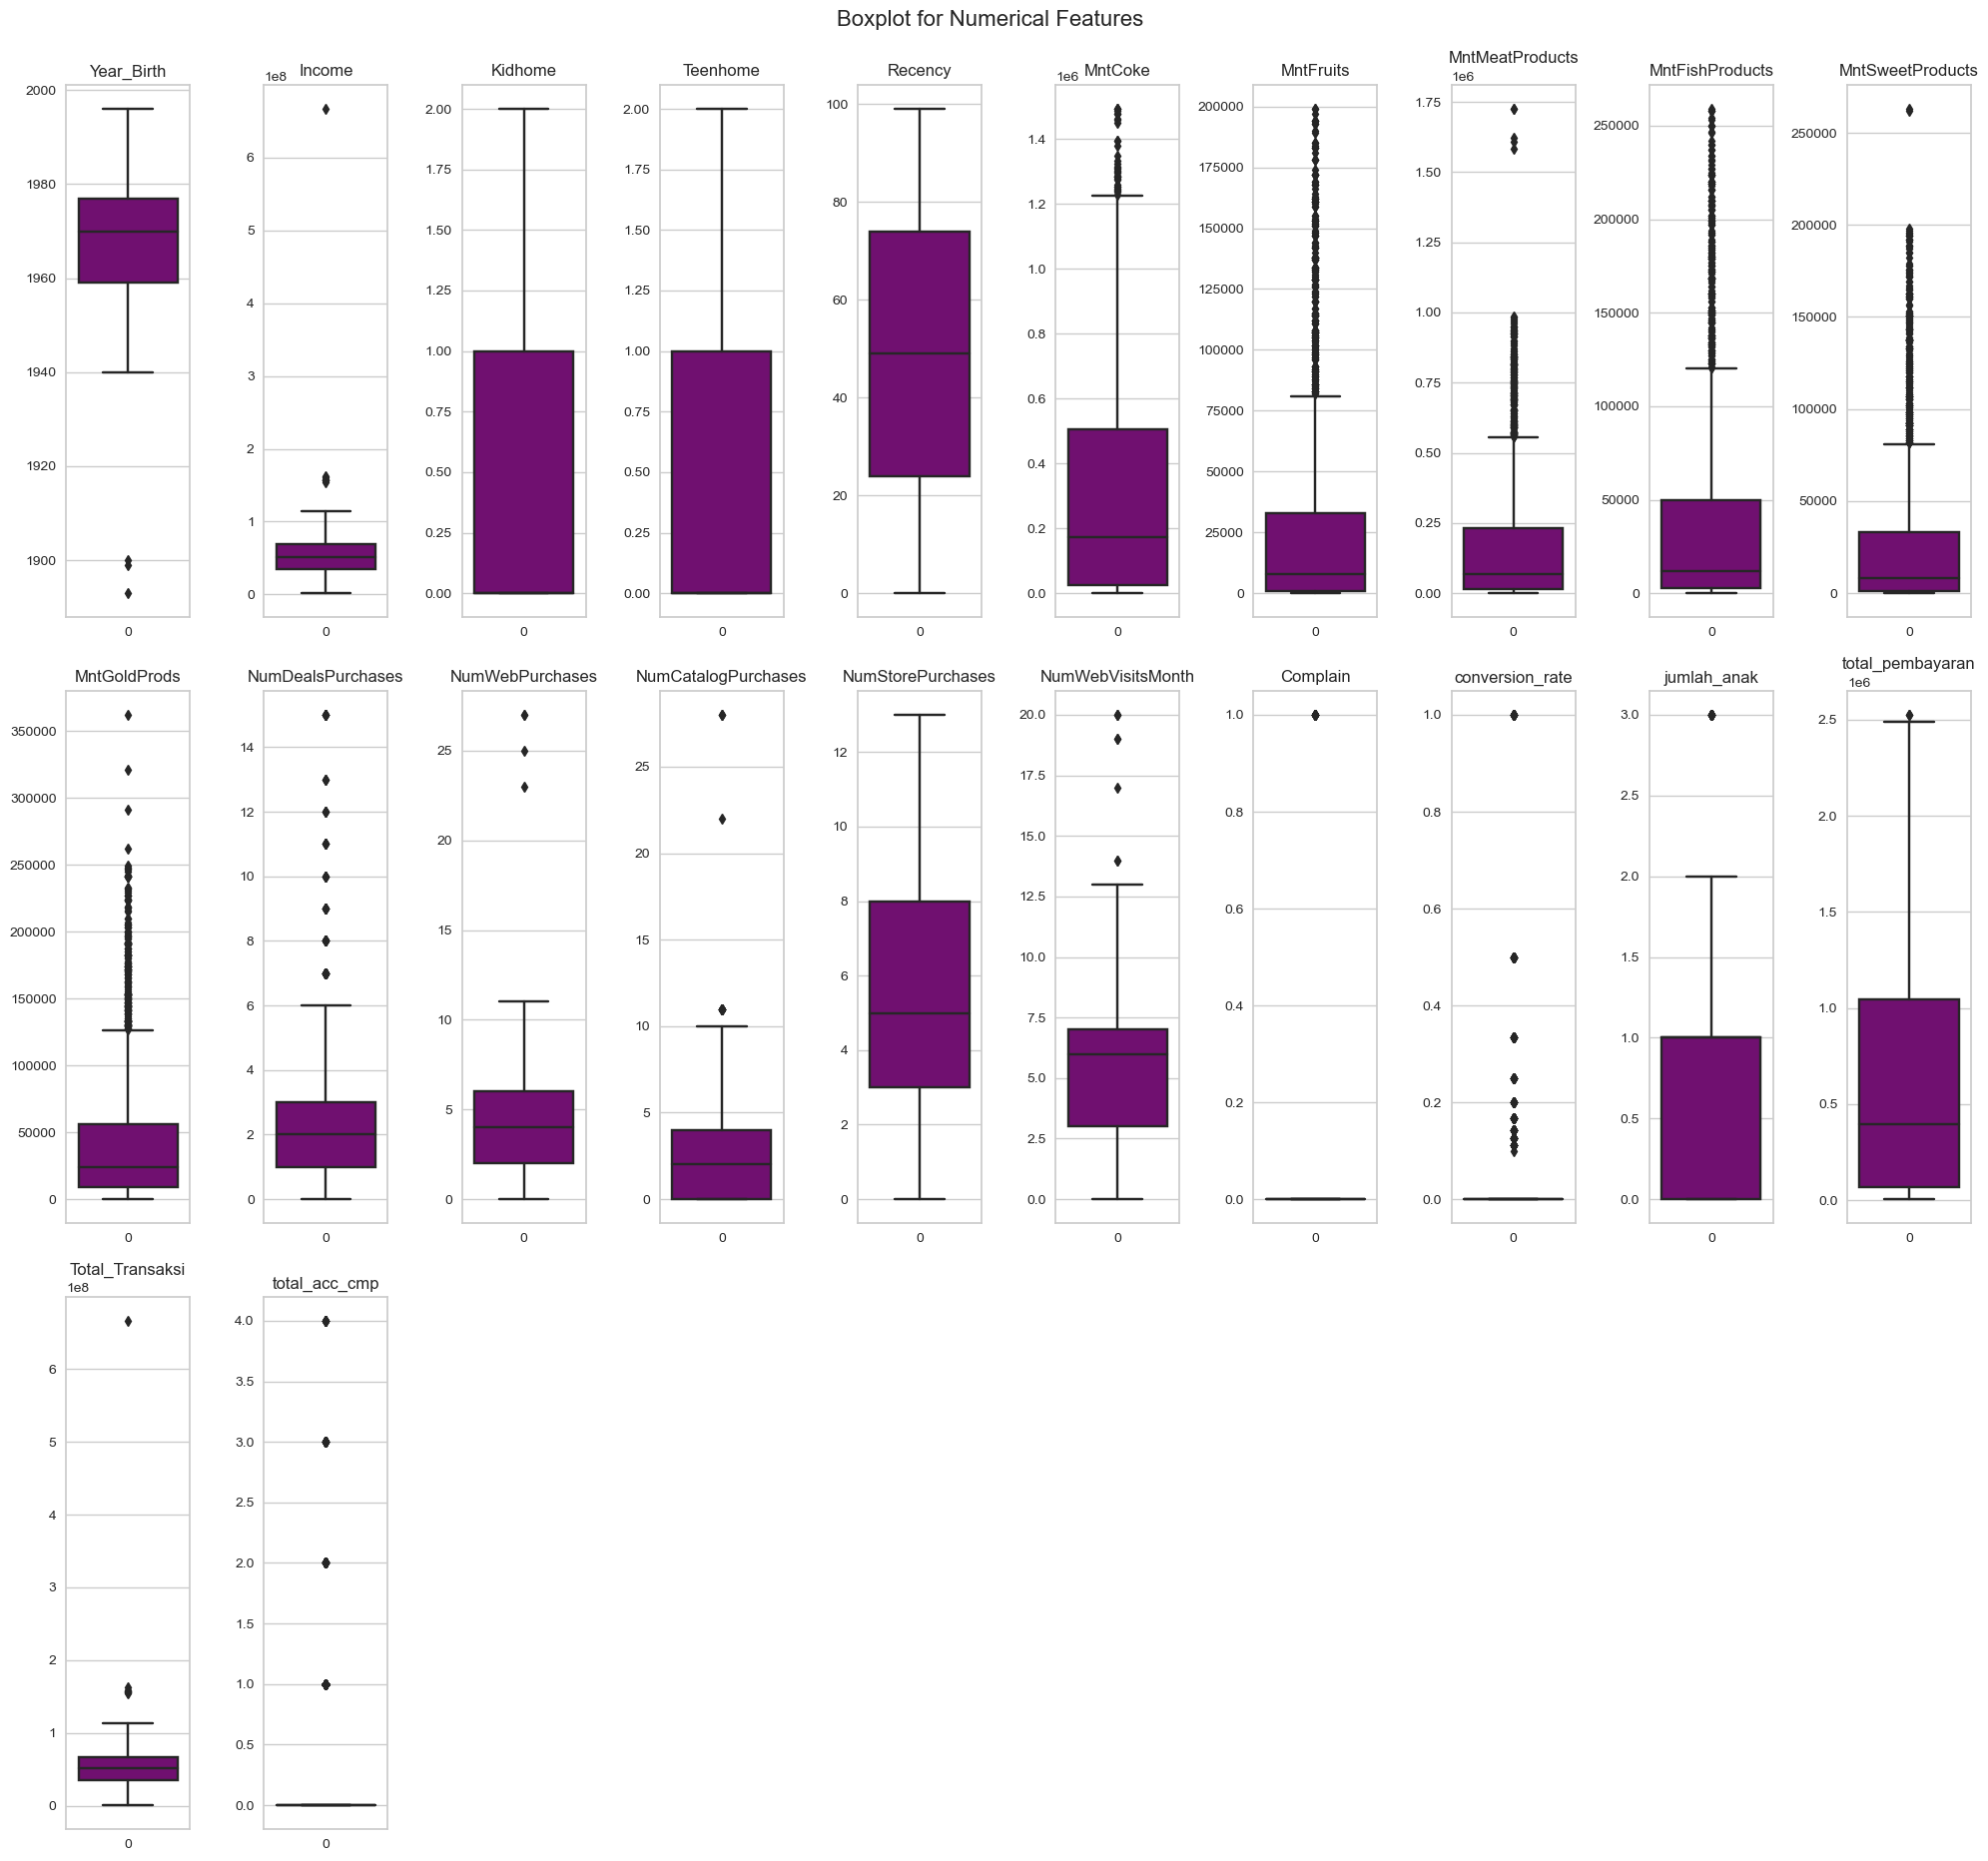

In [18]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.boxplot(df[num[i]], color='purple')
    plt.title(format(num[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

dapat dilihat dari boxplot diatas, tidak ada outlier yang tidak terlalu jauh dari data lainnya dan tidak mempengaruhi hasil analisis data

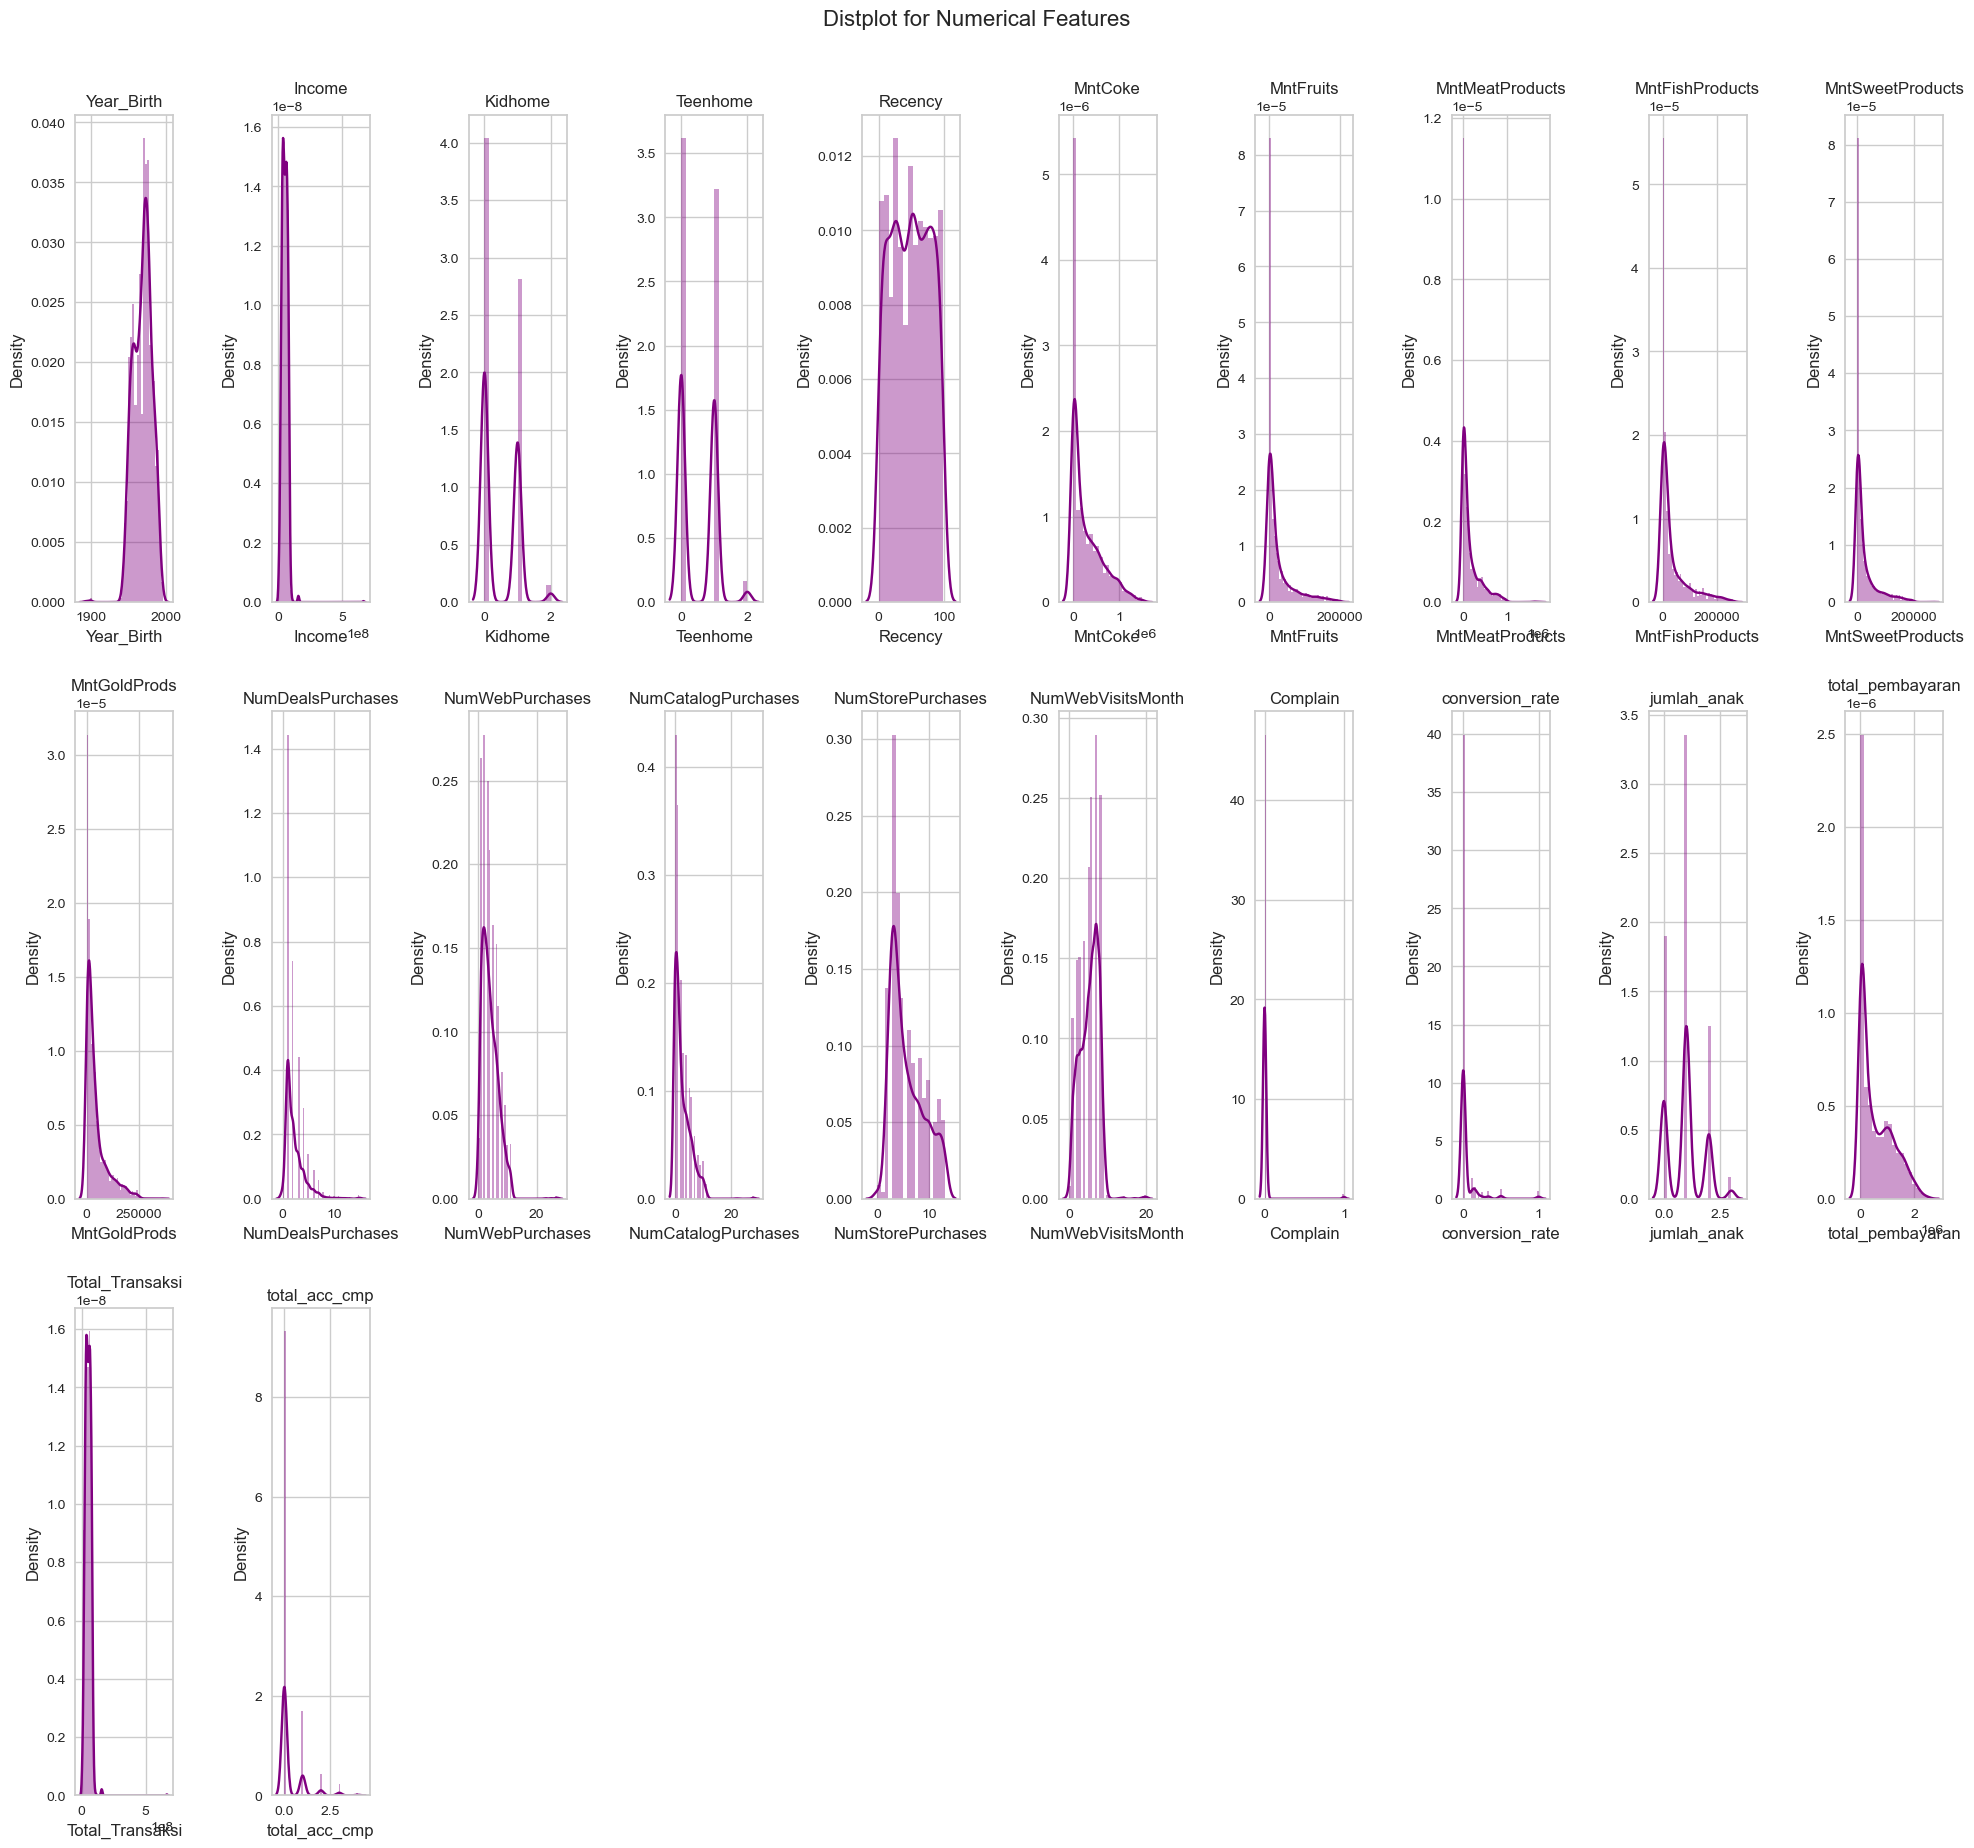

In [19]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.distplot(df[num[i]], color='purple')
    plt.title(format(num[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout(pad=2)

* distribusi normal dimiliki 'total_transaksi', NumWebVisitsMonth, NumStorePurchases, NumWebPurchases, NumDealsPurchases, Recency, Year_Birth
* positively skewed dimiliki MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, conversion_rate
* bimodal atau lebih dari 1 dimiliki total_acc_cmp, jumlah_anak, Kidhome, Teenhome

## Multivariate Analysis

<Axes: >

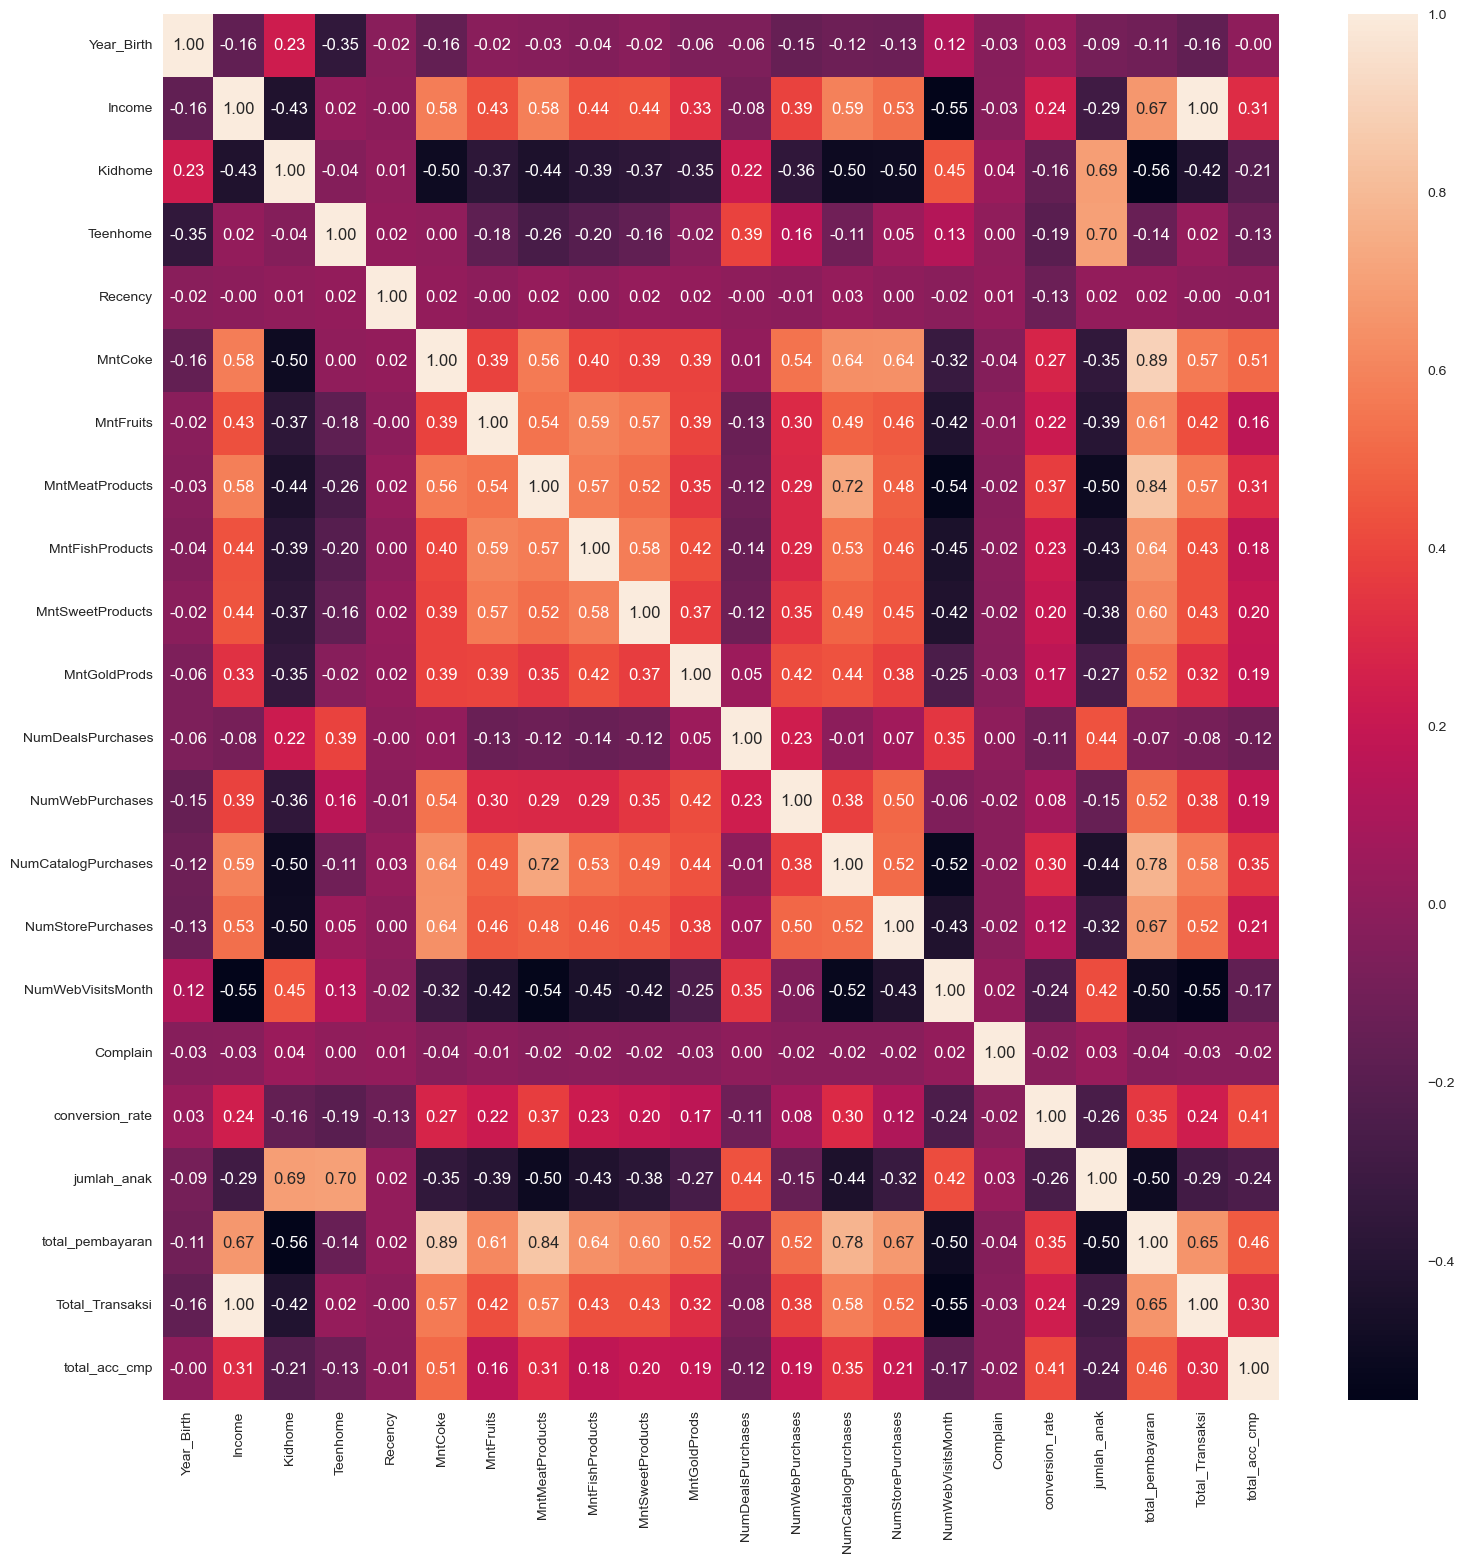

In [20]:
plt.figure(figsize=(18, 18))
sns.heatmap(df[num].corr(), cmap='rocket', annot=True, fmt='.2f')

### Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

In [21]:
# Create correlation age with conversion_rate
agg_age = df.groupby('grup_umur',).agg({'conversion_rate' : 'sum'}).reset_index()
agg_age['total_conversion_rate_grupumur'] = df['conversion_rate'].sum()
agg_age['percentage'] = round((agg_age['conversion_rate'] / agg_age['total_conversion_rate_grupumur'])*100,2)
agg_age

,grup_umur,conversion_rate,total_conversion_rate_grupumur,percentage
0,Dewasa,80.830159,97.375794,83.01
1,Lansia,15.934524,97.375794,16.36
2,Remaja,0.611111,97.375794,0.63


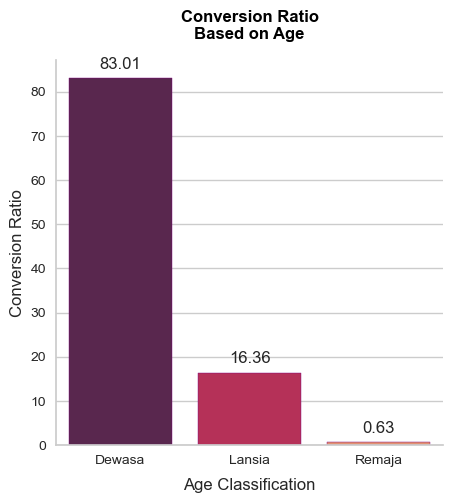

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad = 15)
sns.barplot(data = agg_age, x = 'grup_umur', y = 'percentage', palette = 'rocket', edgecolor = 'purple')
plt.xlabel('Age Classification', labelpad = 8)
plt.bar_label(ax.containers[0], padding=5)
plt.ylabel('Conversion Ratio')

sns.despine()
     

interpretasi:
* terdapat hubungan yang signifikan antara umur customer dengan conversion rate, dimana seseorang yang dewasa cenderung berpengaruh terhadap convertion rate dibanding remaja dan lansia, dikarenakan pada umur dewasa berada di usia aktif dan memiliki income yang lebih besar dibandingkan dengan remaja dan lebih aktiv dibanding lansia

### Membuat plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign

In [23]:
# Create correlation age with conversion_rate
jml_anak = df.groupby('jumlah_anak').agg({'conversion_rate' : 'sum', 'Response' : 'sum'}).reset_index()
jml_anak['total_conversion_rate_jmlanak'] = df['conversion_rate'].sum()
jml_anak['percentage'] = round((jml_anak['conversion_rate'] / jml_anak['total_conversion_rate_jmlanak'])*100,2)
jml_anak

,jumlah_anak,conversion_rate,Response,total_conversion_rate_jmlanak,percentage
0,0,73.066667,169,97.375794,75.04
1,1,17.356349,116,97.375794,17.82
2,2,6.667063,47,97.375794,6.85
3,3,0.285714,2,97.375794,0.29


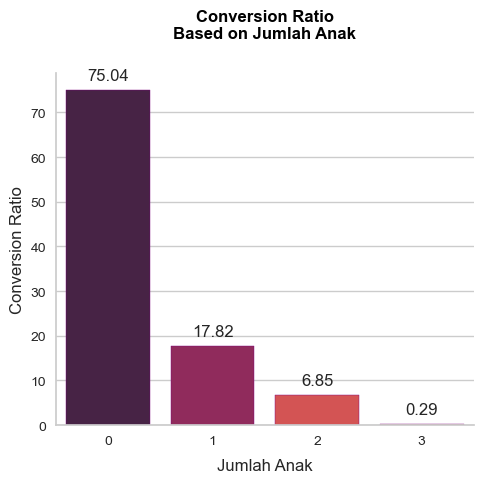

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Jumlah Anak", fontsize=12, color='black', weight='bold', pad = 25)
sns.barplot(data = jml_anak, x = 'jumlah_anak', y = 'percentage', palette = 'rocket', edgecolor = 'purple')
plt.xlabel('Jumlah Anak', labelpad = 8)
plt.ylabel('Conversion Ratio')
plt.tight_layout()
plt.bar_label(ax.containers[0], padding=5)

sns.despine()
     

grafik diatas merupakan hubungan antara conversion rate dan jumlah anak yang berpotensi lebih besar untuk merespon campaign, dapat dilihat seseorang yang tidak memiliki anak cenderung menghasilkan convertion rate lebih banyak dibandingkan dengan yang memiliki anak

In [25]:
# Create correlation age with conversion_rate
grup_inc = df.groupby('grup_income').agg({'conversion_rate' : 'sum', 'Response' : 'sum'}).reset_index()
grup_inc['total_conversion_rate_ttransaksi'] = df['conversion_rate'].sum()
grup_inc['percentage'] = round((grup_inc['conversion_rate'] / grup_inc['total_conversion_rate_ttransaksi'])*100,2)
grup_inc

,grup_income,conversion_rate,Response,total_conversion_rate_ttransaksi,percentage
0,Biasa aja,18.676587,129,97.375794,19.18
1,Kaya,78.699206,205,97.375794,80.82


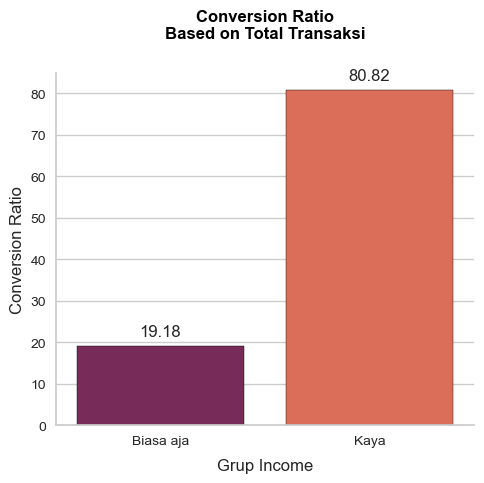

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Total Transaksi", fontsize=12, color='black', weight='bold', pad = 25)
sns.barplot(data = grup_inc, x = 'grup_income', y = 'percentage', palette = 'rocket', edgecolor = 'black')
plt.xlabel('Grup Income', labelpad = 8)
plt.ylabel('Conversion Ratio')
plt.tight_layout()
plt.bar_label(ax.containers[0], padding=5)

sns.despine()
     

grafik diatas merupakan hubungan antara conversion rate dan income yang berpotensi lebih besar untuk merespon campaign, dapat dilihat seseorang yang memiliki income lebih banyak dibandingkan dengan yang biasa aja, cenderung akan memiliki nilai convertion rate lebih tinggi dibandingkan dengan seseorang yang memiliki convertion rate lebih rendah

# Cleaning data

## Data Null

In [27]:
print(df.isnull().values.any())
print(df.isna().sum())

True
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
conversion_rate        11
grup_umur               0
jumlah_anak             0
total_pembayaran        0
Total_Transaksi        24
total_acc_cmp           0
grup_income             0
dtype: int64


### Handling Data Null

In [28]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['conversion_rate'] = df['conversion_rate'].fillna(0)
df['Total_Transaksi'].fillna(df['Total_Transaksi'].mean(), inplace=True)


### Handling Duplicate 


In [29]:
# cek duplikate
df.duplicated().sum()

0

In [30]:
# Cek kembali  Data Null
print(df.isnull().values.any())
print(df.isna().sum())

False
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
conversion_rate        0
grup_umur              0
jumlah_anak            0
total_pembayaran       0
Total_Transaksi        0
total_acc_cmp          0
grup_income            0
dtype: int64


# Data preprocessing

## Membuang data yang tidak diperlukan

In [31]:
# replace value
df = df.replace({'Marital_Status': {'Duda':'Lajang',
                                   'Janda' : 'Lajang',
                                   'Cerai': 'Lajang',
                                   'Bertunangan' : 'Menikah'}})
df.replace("Menikah", "Couple", inplace=True)
df.replace("Lajang", "Single", inplace=True)

df['Marital_Status'].value_counts()

Couple    1444
Single     796
Name: Marital_Status, dtype: int64

In [32]:
df.drop(columns = ['Unnamed: 0','ID', 'Kidhome', 'Teenhome','Recency','Z_CostContact', 'Z_Revenue','Dt_Customer'], inplace=True)

In [33]:
df

,Year_Birth,Education,Marital_Status,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,conversion_rate,grup_umur,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp,grup_income
0,1957,S1,Single,58138000.0,635000,88000,546000,172000,88000,88000,...,0,0,1,0.142857,Dewasa,0,1617000,56521000.0,0,Kaya
1,1954,S1,Single,46344000.0,11000,1000,6000,2000,1000,6000,...,0,0,0,0.000000,Lansia,2,27000,46317000.0,0,Biasa aja
2,1965,S1,Couple,71613000.0,426000,49000,127000,111000,21000,42000,...,0,0,0,0.000000,Dewasa,0,776000,70837000.0,0,Kaya
3,1984,S1,Couple,26646000.0,11000,4000,20000,10000,3000,5000,...,0,0,0,0.000000,Dewasa,1,53000,26593000.0,0,Biasa aja
4,1981,S3,Couple,58293000.0,173000,43000,118000,46000,27000,15000,...,0,0,0,0.000000,Dewasa,1,422000,57871000.0,0,Kaya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,S1,Couple,61223000.0,709000,43000,182000,42000,118000,247000,...,0,0,0,0.000000,Dewasa,1,1341000,59882000.0,0,Kaya
2236,1946,S3,Couple,64014000.0,406000,0,30000,0,0,8000,...,0,0,0,0.000000,Lansia,3,444000,63570000.0,1,Kaya
2237,1981,S1,Single,56981000.0,908000,48000,217000,32000,12000,24000,...,0,0,0,0.000000,Dewasa,0,1241000,55740000.0,1,Kaya
2238,1956,S2,Couple,69245000.0,428000,30000,214000,80000,30000,61000,...,0,0,0,0.000000,Dewasa,1,843000,68402000.0,0,Kaya


## Melakukan feature encoding

In [34]:
df['Education'] = df['Education'].map({'S3' : 4, 'S2' : 3, 'S1':2, 'D3':1, 'SMA':0})
df['grup_income'] = df['grup_income'].map({'Kaya':1, 'Biasa aja':0})
df['grup_umur'] = df['grup_umur'].map({'Dewasa' : 1, 'Lansia': 0, 'Remaja':2})
df['Marital_Status'] = df['Marital_Status'].map({'Single' : 0, 'Couple' : 1})


In [35]:
df

,Year_Birth,Education,Marital_Status,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,conversion_rate,grup_umur,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp,grup_income
0,1957,2,0,58138000.0,635000,88000,546000,172000,88000,88000,...,0,0,1,0.142857,1,0,1617000,56521000.0,0,1
1,1954,2,0,46344000.0,11000,1000,6000,2000,1000,6000,...,0,0,0,0.000000,0,2,27000,46317000.0,0,0
2,1965,2,1,71613000.0,426000,49000,127000,111000,21000,42000,...,0,0,0,0.000000,1,0,776000,70837000.0,0,1
3,1984,2,1,26646000.0,11000,4000,20000,10000,3000,5000,...,0,0,0,0.000000,1,1,53000,26593000.0,0,0
4,1981,4,1,58293000.0,173000,43000,118000,46000,27000,15000,...,0,0,0,0.000000,1,1,422000,57871000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,1,61223000.0,709000,43000,182000,42000,118000,247000,...,0,0,0,0.000000,1,1,1341000,59882000.0,0,1
2236,1946,4,1,64014000.0,406000,0,30000,0,0,8000,...,0,0,0,0.000000,0,3,444000,63570000.0,1,1
2237,1981,2,0,56981000.0,908000,48000,217000,32000,12000,24000,...,0,0,0,0.000000,1,0,1241000,55740000.0,1,1
2238,1956,3,1,69245000.0,428000,30000,214000,80000,30000,61000,...,0,0,0,0.000000,1,1,843000,68402000.0,0,1


## Melakukan standardisasi pada feature

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scd = StandardScaler()
y_fit = scd.fit_transform(df.astype(float))
y_fit

array([[-0.98534473, -0.45838256, -1.34687429, ...,  0.19811737,
        -0.43903713,  1.02166316],
       [-1.23573295, -0.45838256, -1.34687429, ..., -0.21607287,
        -0.43903713, -0.97879618],
       [-0.3176428 , -0.45838256,  0.74245979, ...,  0.77921768,
        -0.43903713,  1.02166316],
       ...,
       [ 1.01776106, -0.45838256, -1.34687429, ...,  0.16641583,
         1.03539042,  1.02166316],
       [-1.06880747,  0.53752135,  0.74245979, ...,  0.68037867,
        -0.43903713,  1.02166316],
       [-1.23573295,  1.53342527,  0.74245979, ...,  0.04289751,
        -0.43903713,  1.02166316]])

In [37]:
df_cluster = df.copy()


In [38]:
df

,Year_Birth,Education,Marital_Status,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,conversion_rate,grup_umur,jumlah_anak,total_pembayaran,Total_Transaksi,total_acc_cmp,grup_income
0,1957,2,0,58138000.0,635000,88000,546000,172000,88000,88000,...,0,0,1,0.142857,1,0,1617000,56521000.0,0,1
1,1954,2,0,46344000.0,11000,1000,6000,2000,1000,6000,...,0,0,0,0.000000,0,2,27000,46317000.0,0,0
2,1965,2,1,71613000.0,426000,49000,127000,111000,21000,42000,...,0,0,0,0.000000,1,0,776000,70837000.0,0,1
3,1984,2,1,26646000.0,11000,4000,20000,10000,3000,5000,...,0,0,0,0.000000,1,1,53000,26593000.0,0,0
4,1981,4,1,58293000.0,173000,43000,118000,46000,27000,15000,...,0,0,0,0.000000,1,1,422000,57871000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,1,61223000.0,709000,43000,182000,42000,118000,247000,...,0,0,0,0.000000,1,1,1341000,59882000.0,0,1
2236,1946,4,1,64014000.0,406000,0,30000,0,0,8000,...,0,0,0,0.000000,0,3,444000,63570000.0,1,1
2237,1981,2,0,56981000.0,908000,48000,217000,32000,12000,24000,...,0,0,0,0.000000,1,0,1241000,55740000.0,1,1
2238,1956,3,1,69245000.0,428000,30000,214000,80000,30000,61000,...,0,0,0,0.000000,1,1,843000,68402000.0,0,1


# K-Means Clustering - PCA

## Melihat jumlah cluster yang tepat dengan menggunakan elbow method

In [39]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 42)
    kmeans.fit(y_fit)
    inertia.append(kmeans.inertia_)

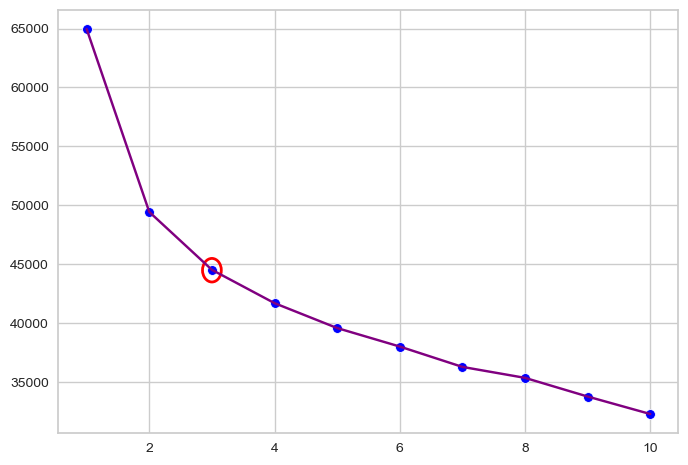

In [40]:
sns.lineplot(x=range(1,11), y = inertia, color = 'purple')
sns.scatterplot(x=range(1,11), y = inertia, s = 50, color = 'blue')
circle = Ellipse((3, 44500), width=0.3, height=2000, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
# plt.gca().autoscale_view()
plt.show()

## Melakukan implementasi clustering dengan menggunakan k-means clustering


In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_cluster.values)
df_cluster['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

<Axes: xlabel='total_pembayaran', ylabel='Income'>

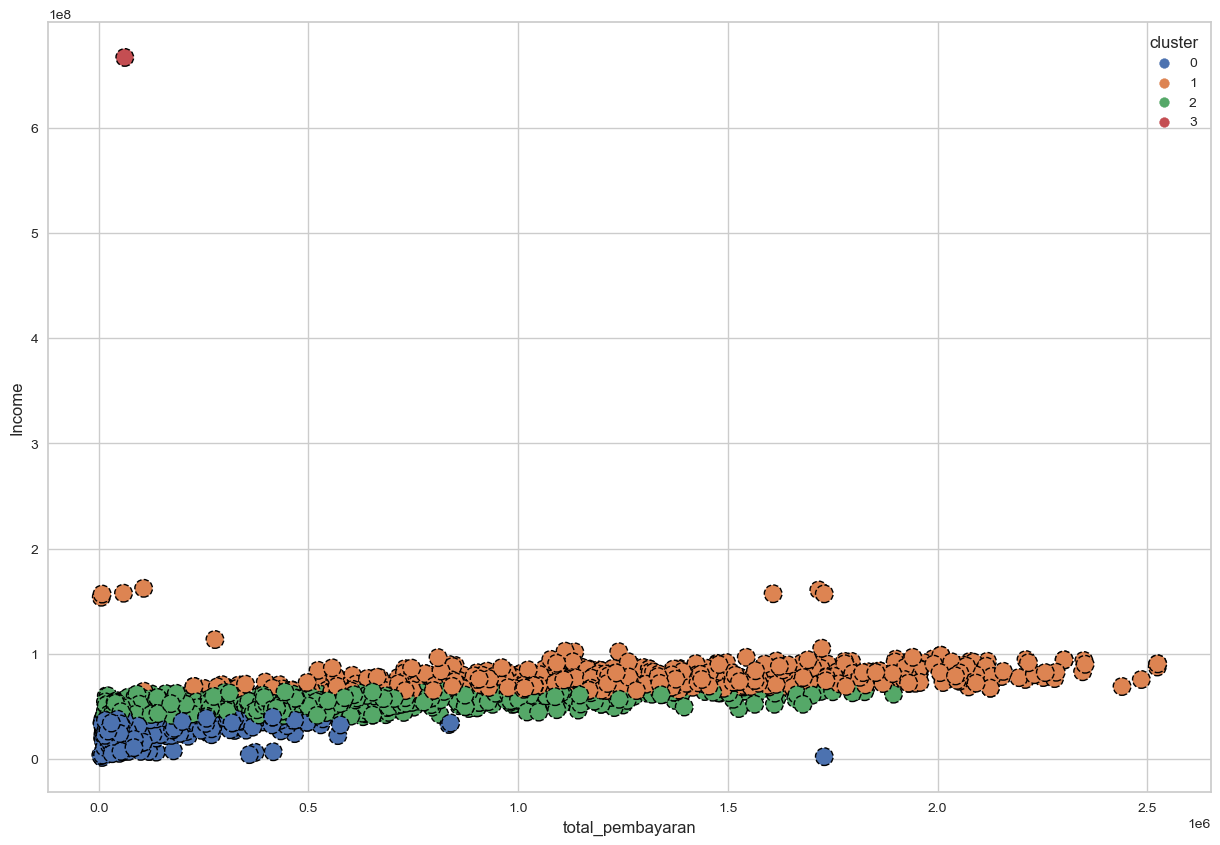

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(
    x="total_pembayaran", y="Income",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=df_cluster,
    palette="deep",
    s=160,
    ax=ax
)

## Sillhouette score

In [41]:
# Menghitung sillhouette score melihat bagaimana performa model yang didapat

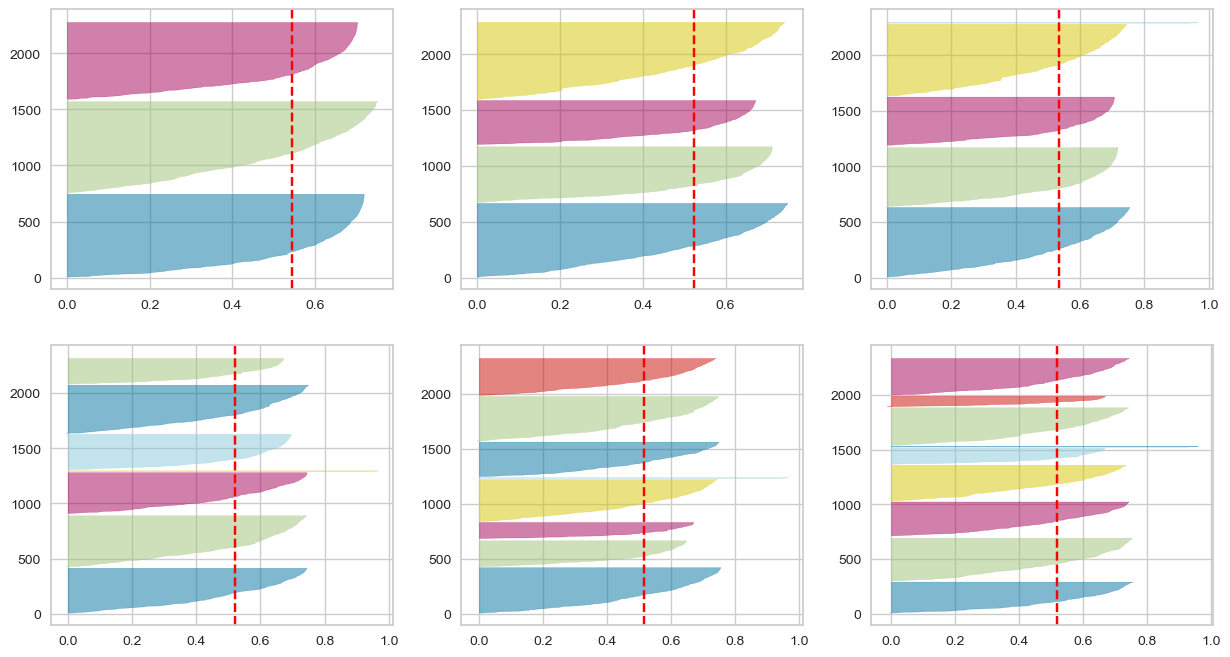

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster = [4,5,6,8,9,10]
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 4)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)